## Quality filtering for sequencing data

Uptil now, we have been using all reads without taking the information from the basecaller's quality threshold into clustering. I wish to examine the following

1. What is the difference in the IDS rates in a normal sequencing experiment as a function of the quality of the read?
2. Can we isolate the errors introduced by synthesis by filtering out low quality reads? 

### IDS rates for different quality reads
Testing on the barcoded run (cleaner data) - 200125

In [32]:
import Bio
from utils import get_fastq_records, reverse_complement
import os
import numpy as np
import matplotlib.pyplot as plt
from Levenshtein import ratio

In [ ]:
from Bio import SeqIO
for record in SeqIO.parse(input_file, "fastq"):
    score=record.letter_annotations["phred_quality"]

In [63]:
original_sequence = "AGTGCAACAAGTCAATCCGTTTCCCCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGGGGATCCTAACTGGGGCGCCGACCTGGAGAAACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTT"

In [64]:
fq_filepath = r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\sequencingData\261124_100ng150ntOK_500nMRV_200fmolONT\fastq_pass\AWI798_pass_d23caac0_2abf8495_0.fastq"

In [65]:
records = get_fastq_records(fq_filepath)

196it [00:00, 48968.52it/s]


In [66]:
avg_qualities = [np.mean(i.letter_annotations["phred_quality"]) for i in records]

Text(0, 0.5, 'Number of reads')

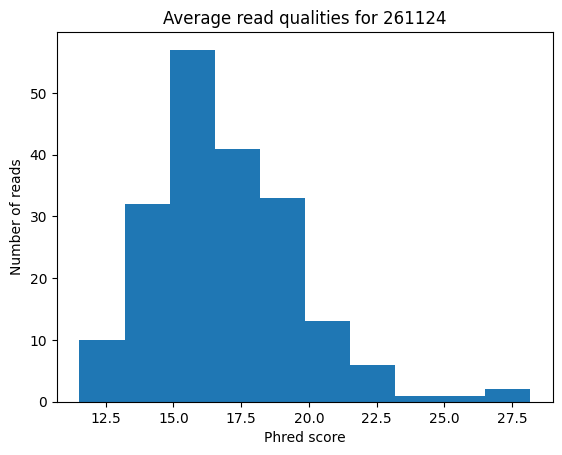

In [68]:
plt.hist(avg_qualities)
plt.title("Average read qualities for 261124")
plt.xlabel("Phred score")
plt.ylabel("Number of reads")

In [69]:
from evaluation import count_ids_errors
from tqdm.notebook import tqdm
# Checking ids rates for both reads

quality_score = []

subsitutions = []
insertions = []
deletions = []

for record in tqdm(records):

    strand = str(record.seq)
    rev_strand = reverse_complement(strand)

    if ratio(strand, original_sequence) < ratio(rev_strand, original_sequence):
        strand = rev_strand

    ids = count_ids_errors(strand, original_sequence)
    subsitutions.append(ids["Substitutions"])
    deletions.append(ids["Deletions"])
    insertions.append(ids["Insertions"])
    quality_score.append(
        np.mean(record.letter_annotations["phred_quality"]))
    

  0%|          | 0/196 [00:00<?, ?it/s]

In [74]:
import pandas as pd

df = pd.DataFrame({
    "subsitutions": subsitutions,
    "insertions": insertions,
    "quality": quality_score
    })

In [75]:
df.corr()

,subsitutions,insertions,quality
subsitutions,1.000000,0.329838,-0.217187
insertions,0.329838,1.000000,-0.166874
quality,-0.217187,-0.166874,1.000000


1. Moderately, higher quality scores lead to lower subsitutions
2. Very weakly, higher quality scores lead to lower insertions

Let's check the other sequences

In [78]:
# Average quality per/aligned base
# Average prediction error (IDS)